# Exploratory Data Analysis for House Price Prediction

The aim of this project is to build and deploy a machine learning model to predict the median sale price of residential houses in various districts in California

### Why is this important?

A practical use of this is for Real Estate Investments for Realtors to identify profitable investment opportunities, as well as potential homeowners who are in the market looking to puchase a home in the district.

It also finds use in getting to understand current realities in the housing market and how stakeholders (Investors, Businesses and even the Government) can leverage this in order to invest in owning a home, or investing in one. Governments would need this type of information, as it would help them create programs that are geared towards assisting individuals with getting their first homes.

# What is the Objective of this model?

We aim to minimize instances where we make overpriced or underpriced offers to new hires. We will evaluate model performance with:

1. Mean Squared Error (MSE)
2. Root Mean Squared Error (RMSE)
3. r-squared (R<sup>2</sup>)


## Exploratory Data Analysis

Load the datasets after importing relevant libraries and packages.

#### Dataset Credits

In [1]:
#import libraries

from getdata import fetch_housing_data, load_housing_data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import scipy.stats as stats

In [2]:
fetch_housing_data()

In [3]:
dataset = load_housing_data()
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Attribute Combinations (Feature Enrichment and Expansion)

Because of the unique nature of the dataset and this project, we shall embark on some preliminary feature engineering, in order to enrich our dataset and expand the feature space. From domain experience within our culture, it makes sense to derive features that have to do with the number of rooms in a house, number of bedrooms in a house and the number of residents living in a home.

Also, it is important to evaluate the average income of a household, as that could be a potential measure of affordability of a house.

We shall also create categories for the median age and median income, to align with generally used age and income brackets.

With the above premise, we will proceed with generating the following features:

1. `age_group`
2. `income_bracket`
3. `rooms_per_household`
4. `bedrooms_per_household`
5. `population_per_household`
6. `income_per_household`

In [4]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Add the age group categorcal feature
age_groups = []
for index, value in dataset['housing_median_age'].iteritems():
    if value < 18:
        age_groups.append("minor")
    elif value >= 18 and value <=30:
        age_groups.append("young")
    elif value > 30 and value <= 50:
        age_groups.append("middle-aged")
    else:
        age_groups.append("elderly")
dataset['age_group'] = age_groups

In [6]:
dataset['age_group'].unique()

array(['middle-aged', 'young', 'elderly', 'minor'], dtype=object)

In [7]:
dataset.shape

(20640, 11)

In [8]:
# Add the income bracket categorical feature
income_brackets = []
for index, value in dataset['median_income'].iteritems():
    if value <= 5:
        income_brackets.append("low-income")
    elif value > 5 and value <= 10:
        income_brackets.append("middle-income")
    else:
        income_brackets.append("high-income")
dataset['income_bracket'] = income_brackets

In [9]:
dataset['income_bracket'].unique()

array(['middle-income', 'low-income', 'high-income'], dtype=object)

In [10]:
# Add the rooms per household, bedrooms per household, population per household and median income per household features
dataset['rooms_per_household'] = dataset['total_rooms']/dataset['households']
dataset['bedrooms_per_household'] = dataset['total_bedrooms']/dataset['households']
dataset['population_per_household'] = dataset['population']/dataset['households']
dataset['median_income_per_household'] = dataset['median_income']/dataset['households']

In [11]:
dataset.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,age_group,income_bracket,rooms_per_household,bedrooms_per_household,population_per_household,median_income_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,middle-aged,middle-income,6.984127,1.023810,2.555556,0.066073
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,young,middle-income,6.238137,0.971880,2.109842,0.007295
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,elderly,middle-income,8.288136,1.073446,2.802260,0.041002
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,elderly,middle-income,5.817352,1.073059,2.547945,0.025768
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,elderly,low-income,6.281853,1.081081,2.181467,0.014850


In [12]:
train_df, test_df = train_test_split(dataset, test_size=0.3, random_state=42)

In [13]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [14]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,age_group,income_bracket,rooms_per_household,bedrooms_per_household,population_per_household,median_income_per_household
0,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312,193800.0,<1H OCEAN,middle-aged,low-income,5.882353,0.975490,2.985294,0.010125
1,-117.09,32.79,20.0,2183.0,534.0,999.0,496.0,2.8631,169700.0,NEAR OCEAN,young,low-income,4.401210,1.076613,2.014113,0.005772
2,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026,259800.0,NEAR OCEAN,young,low-income,5.617544,0.989474,2.564912,0.014746
3,-121.00,39.26,14.0,810.0,151.0,302.0,138.0,3.1094,136100.0,INLAND,minor,low-income,5.869565,1.094203,2.188406,0.022532
4,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068,500001.0,NEAR BAY,elderly,low-income,4.801205,1.066265,2.298193,0.004980


In [15]:
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,age_group,income_bracket,rooms_per_household,bedrooms_per_household,population_per_household,median_income_per_household
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,young,low-income,4.192201,NaN,3.877437,0.004683
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,young,low-income,5.039384,NaN,2.679795,0.004334
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,elderly,low-income,3.977155,NaN,1.360332,0.003614
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,minor,middle-income,6.163636,NaN,3.444444,0.011591
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,middle-aged,low-income,5.492991,NaN,2.483645,0.008703


In [16]:
print(train_df.shape, test_df.shape)

(14448, 16) (6192, 16)


In [17]:
test_df.to_csv("test.csv")

In [18]:
train_df.to_csv("train.csv")

The Housing Train Dataset contains 14,448 rows and 16 columns

15 are predictors and 1 is the target variable

# Analysis

*We will analyze the following:*

1. The Label(Target Variable)

2. Feature Data Types (Categorical and Numerical)

3. Check for missing data

4. Numerical Features
    - Analyzing Geographical Data
    - Discrete or Continuous
    - Distributions
    - Transformations

5. Categorical Features
    - Cardinality
    - Presence of Rare Categories
    - Special mappings

## Label (Target Variable)

We shall begin with the Variable we're going to predict: `salary`

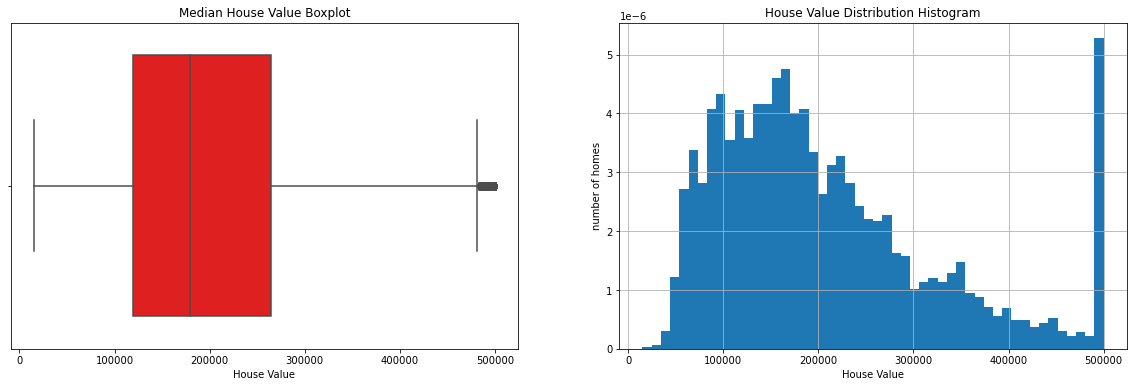

In [19]:
# Boxplot and Histogram to evaluate the target distribution


plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
plt.title('Median House Value Boxplot')
sns.boxplot(x=train_df['median_house_value'], color='r')
plt.xlabel('House Value')

plt.subplot(1,2,2)
plt.title('House Value Distribution Histogram')
train_df['median_house_value'].hist(bins=50, density=True)
plt.ylabel('number of homes')
plt.xlabel('House Value')
plt.show()

We can see that the target is continuous, and the distribution is skewed to the right, with outliers at the maximum value.

Let us improve the value spread with a mathematical transformation. We will compare log transform with the Yeo-Johnson Transformation


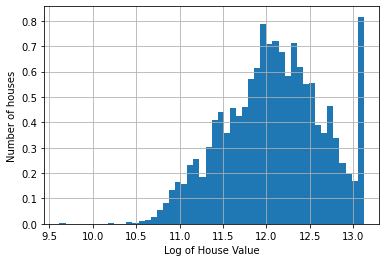

In [20]:
# Using Log transform

np.log(train_df['median_house_value']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Log of House Value')
plt.show()

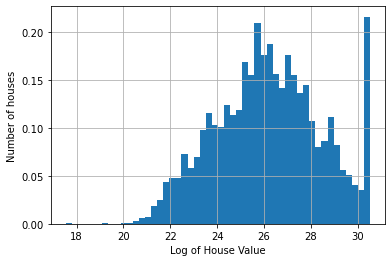

In [21]:
# Using thr Yeo-Johnson Transformation

tmp = train_df.copy()
tmp['median_house_value'], param = stats.yeojohnson(train_df['median_house_value'])
tmp['median_house_value'].hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Log of House Value')
plt.show()

The Yeo-Johnson transform looks more Gaussian than the Log Transform, both of which are an improvement of the original values.

We can move ahead to analyze the various variable types

## Variable Types

Let us identify the Categorical and numerical variable

In [22]:
# Capturing the Categorical variables (of type 'object')
cat_vars = [var for var in train_df.columns if train_df[var].dtype == 'O']
train_df[cat_vars].head()

# Number of Categorical Variables
len(cat_vars)

3

In [23]:
# Capturing the Numerical Variables
num_vars = [var for var in train_df.columns if var not in cat_vars and var != 'median_house_value']
train_df[num_vars].head()

# Number of Numerical Variables
len(num_vars)

12

## Missing Values

Now, we shall find out which features contain missing values

In [24]:
# Make a list of the variables that contain missing values
vars_with_na = [var for var in train_df.columns if train_df[var].isnull().sum() > 0]

# Determine percent of missing data and display the results
train_df[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

There are no null values in the dataset. We confirm this by listing all the columns and datatypes

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   longitude                    14448 non-null  float64
 1   latitude                     14448 non-null  float64
 2   housing_median_age           14448 non-null  float64
 3   total_rooms                  14448 non-null  float64
 4   total_bedrooms               14448 non-null  float64
 5   population                   14448 non-null  float64
 6   households                   14448 non-null  float64
 7   median_income                14448 non-null  float64
 8   median_house_value           14448 non-null  float64
 9   ocean_proximity              14448 non-null  object 
 10  age_group                    14448 non-null  object 
 11  income_bracket               14448 non-null  object 
 12  rooms_per_household          14448 non-null  float64
 13  bedrooms_per_hou

In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6192 entries, 0 to 6191
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   longitude                    6192 non-null   float64
 1   latitude                     6192 non-null   float64
 2   housing_median_age           6192 non-null   float64
 3   total_rooms                  6192 non-null   float64
 4   total_bedrooms               5985 non-null   float64
 5   population                   6192 non-null   float64
 6   households                   6192 non-null   float64
 7   median_income                6192 non-null   float64
 8   median_house_value           6192 non-null   float64
 9   ocean_proximity              6192 non-null   object 
 10  age_group                    6192 non-null   object 
 11  income_bracket               6192 non-null   object 
 12  rooms_per_household          6192 non-null   float64
 13  bedrooms_per_house

We find some nulls in the test dataset. We will keep this in mind when processing it.

## Numerical Features

We have 2 numerical features in the dataset and we shall find out if either or both are discrete or continous

In [27]:
print('Number of Numerical variables: ', len(num_vars))

train_df[num_vars].head()

Number of Numerical variables:  12


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household,median_income_per_household
0,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312,5.882353,0.975490,2.985294,0.010125
1,-117.09,32.79,20.0,2183.0,534.0,999.0,496.0,2.8631,4.401210,1.076613,2.014113,0.005772
2,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026,5.617544,0.989474,2.564912,0.014746
3,-121.00,39.26,14.0,810.0,151.0,302.0,138.0,3.1094,5.869565,1.094203,2.188406,0.022532
4,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068,4.801205,1.066265,2.298193,0.004980


### Analyzing Geographical Data

We have geographical information(Latitude and Longitude). Let us create a scatterplot of all the districts and visualize the data

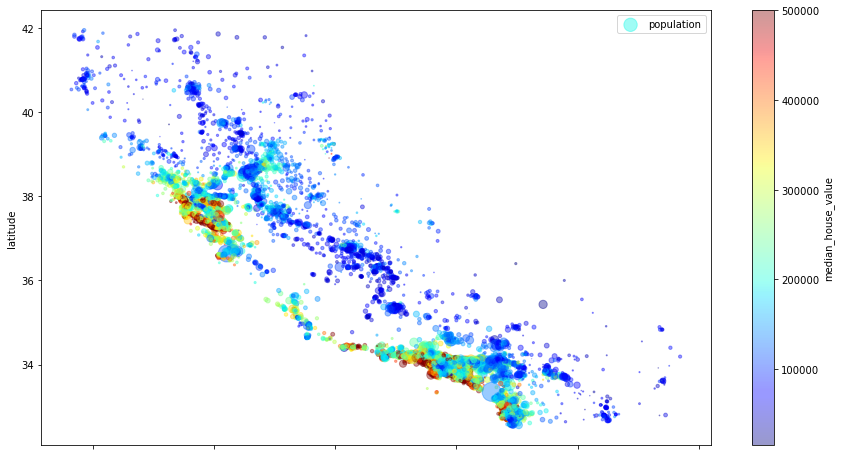

In [28]:
train_df.plot.scatter(x="longitude", y="latitude", alpha=0.4,
                      s=train_df['population']/100, label='population',
                     figsize=(15, 8), c='median_house_value', 
                      cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

### Discrete Features

Let us proceed to find out which features are discrete (showing a finite number of values)

In [29]:
discrete_vars = [var for var in num_vars if len(train_df[var].unique()) < 20]

print(len(discrete_vars))

0


There are no discrete variables in this dataset

### Continuous Features

Let us proceed to find the distribution of the continuous features. We will consider those that are not geographical variables

In [30]:
cont_vars = [var for var in num_vars if var not in discrete_vars+["longitude", "latitude"]]

print(len(cont_vars))

10


In [31]:
# Visualize the Continuous Features

train_df[cont_vars].head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household,median_income_per_household
0,35.0,2400.0,398.0,1218.0,408.0,4.1312,5.882353,0.975490,2.985294,0.010125
1,20.0,2183.0,534.0,999.0,496.0,2.8631,4.401210,1.076613,2.014113,0.005772
2,24.0,1601.0,282.0,731.0,285.0,4.2026,5.617544,0.989474,2.564912,0.014746
3,14.0,810.0,151.0,302.0,138.0,3.1094,5.869565,1.094203,2.188406,0.022532
4,52.0,3188.0,708.0,1526.0,664.0,3.3068,4.801205,1.066265,2.298193,0.004980


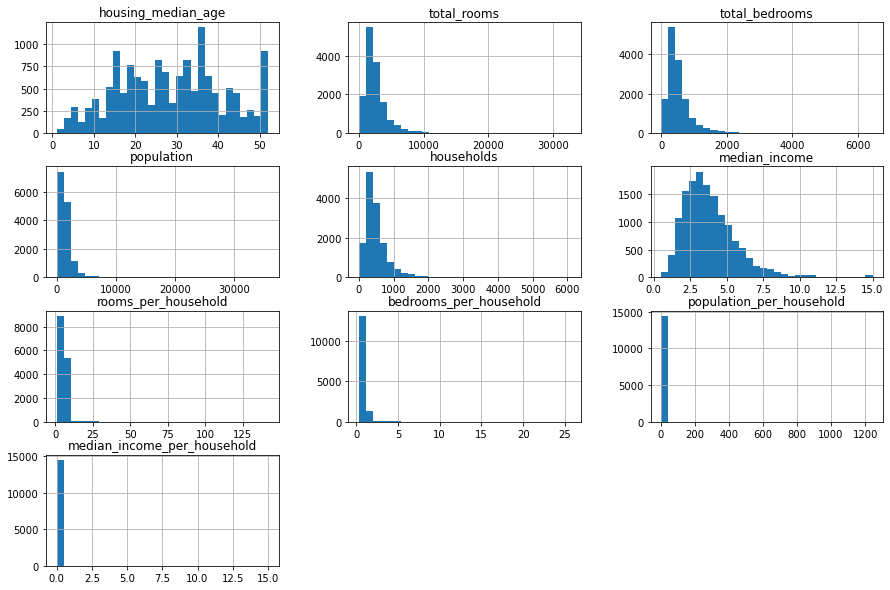

In [32]:
# Plot histograms to veiw distribution of the Continuous Features

train_df[cont_vars].hist(bins=30, figsize=(15,10))
plt.show()

The features are not normally distributed and a few of them are really skewed, like `rooms_per_household`, `bedrooms_per_household`, `population_per_household`, and `median_income_per_household`

We can try transforming these, to see if the spread can be improved, which also can improve model performance. Let us apply the Yeo-Johnson Transformation to the very skewed variables.

In [33]:
# Capture the Skewed variables for later

skewed = ["rooms_per_household", "bedrooms_per_household", 
          "population_per_household", "median_income_per_household"]

In [34]:
# Capture the remaining continuous features

cont_vars = [item for item in cont_vars if item not in skewed]
cont_vars

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

### Yeo-Johnson Transformation

Let's go ahead and analyze the variable distributions after applying the Yeo-Johnson transformation

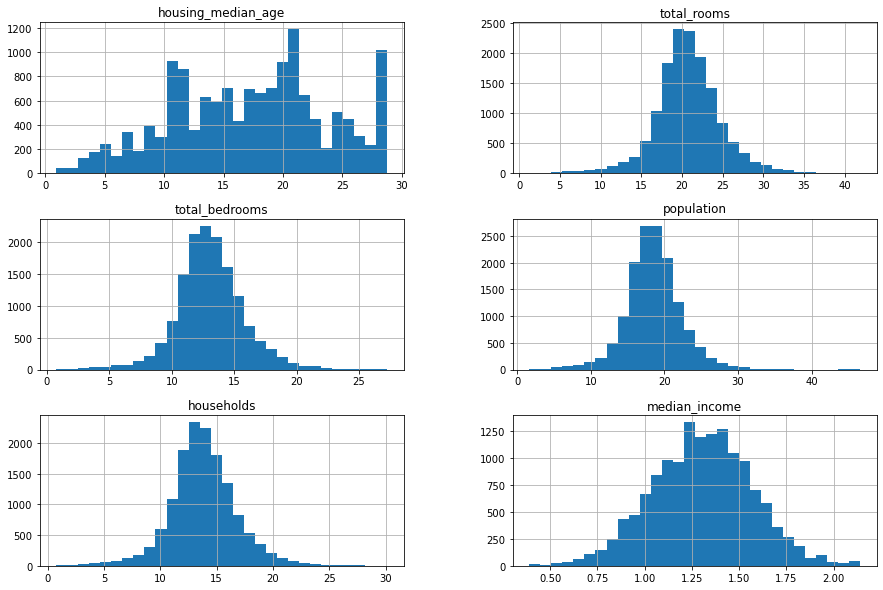

In [35]:
tmp = train_df.copy()

for var in cont_vars:
    tmp[var], param = stats.yeojohnson(train_df[var])
    
tmp[cont_vars].hist(bins=30, figsize=(15, 10))
plt.show()

The Yeo-Johnson transformation did a great job with all of the remaining continuous features, and the `housing_median_age`, though not completely normalized, has a more even spread.

Whether this helps improve the predictive power of the model remains to be seen. Let's do a visual exploration and compare the original values and the transformed values side by side

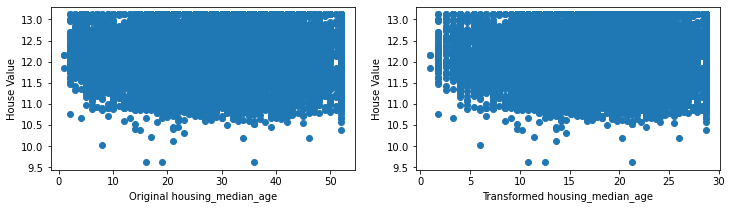

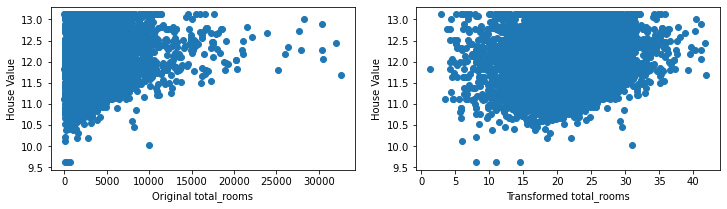

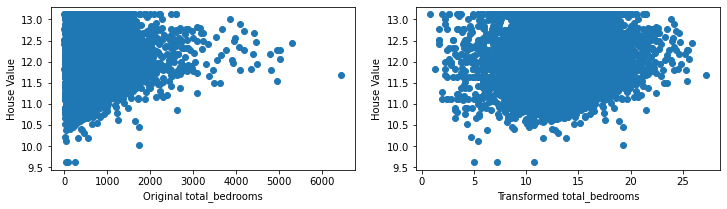

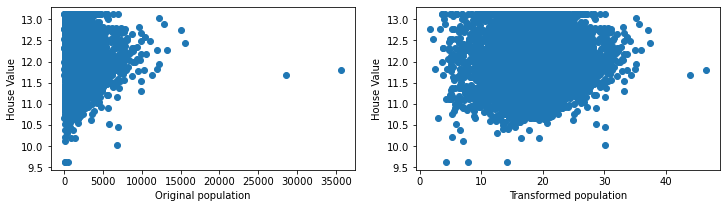

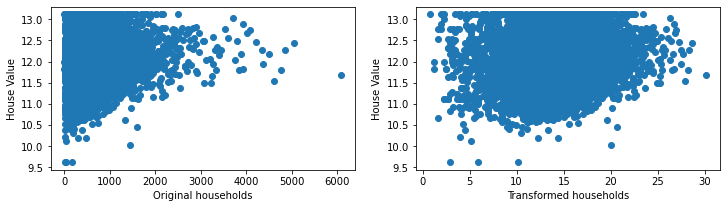

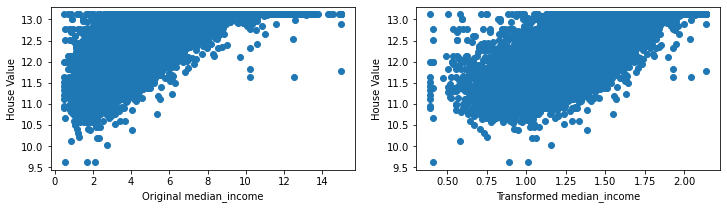

In [36]:
for var in cont_vars:
    
    plt.figure(figsize=(12,3))
    
     # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(train_df[var], np.log(train_df['median_house_value']))
    plt.ylabel('House Value')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['median_house_value']))
    plt.ylabel('House Value')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

It appears that the Yeo-Johnson Transformation improved spread for all the variables. 

However the `housing_median_age` feature seems well spread already.

Let us try the Logarithmic transformation, and see if we will get better results.

### Logarithmic transformation

array([[<AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>]], dtype=object)

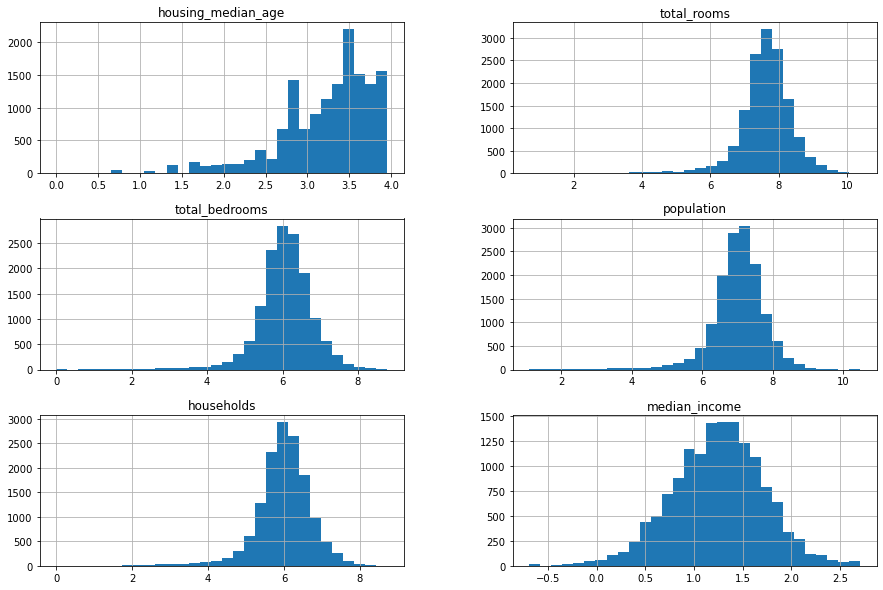

In [37]:
tmp = train_df.copy()

for var in cont_vars:
    tmp[var] = np.log(train_df[var])
    
tmp[cont_vars].hist(bins=30, figsize=(15, 10))

Great results as the Yeo-Johnson, but now the `housing_median_age` is more skewed to the left than before. Not a good sign. Let us also do the side by side plot

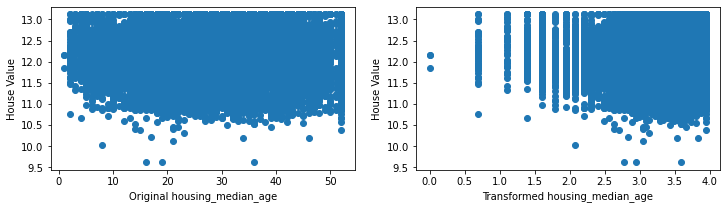

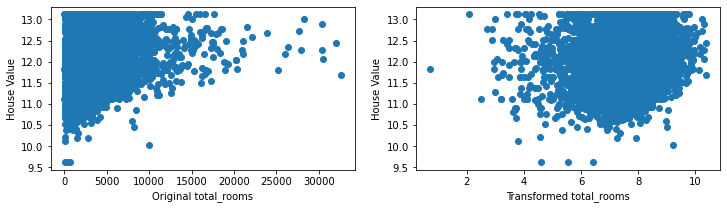

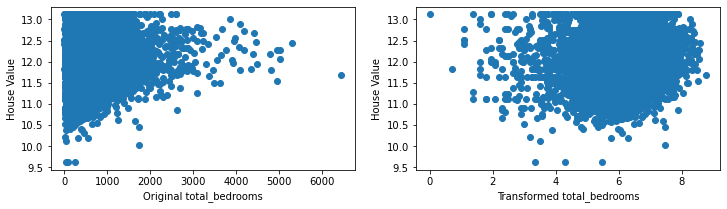

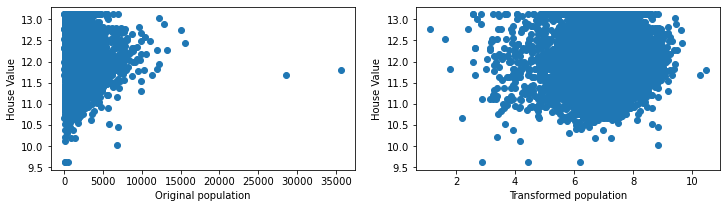

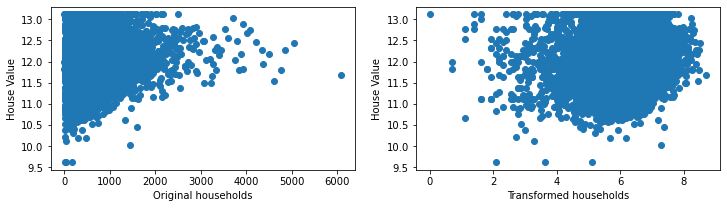

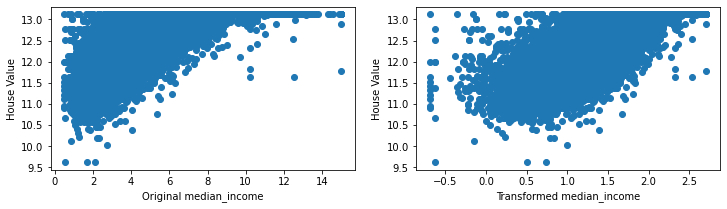

In [38]:
for var in cont_vars:
    
    plt.figure(figsize=(12,3))
    
     # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(train_df[var], np.log(train_df['median_house_value']))
    plt.ylabel('House Value')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['median_house_value']))
    plt.ylabel('House Value')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

The log transformations produced similar great values for all, except the `housing_median_age` for the Log transform, so we stick with the Yeo-Johnson transformations.

Now, let us take a look at the Skewed Features.

### Skewed Variables

Let us transform these into binary variables and see how predictive they are

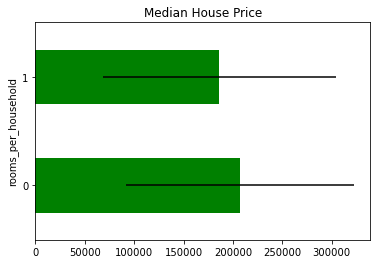

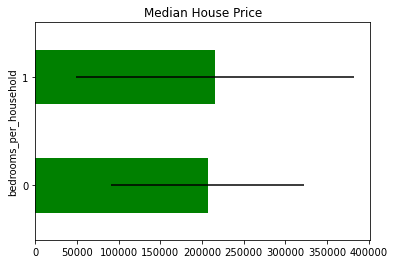

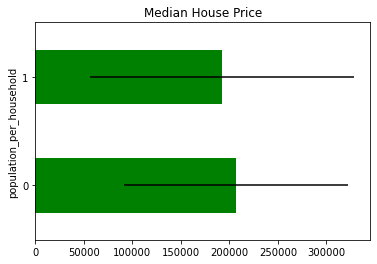

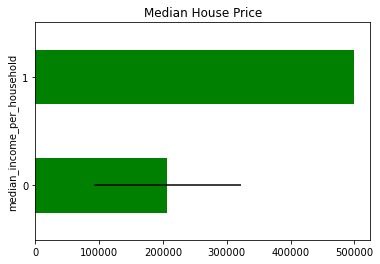

In [39]:
for var in skewed:
    tmp = train_df.copy()
    
    # map the feature values into 0 and 1
    tmp[var] = np.where(train_df[var] <= 10, 0, 1)
    
    # determine median house price in the mapped values
    tmp = tmp.groupby(var)['median_house_value'].agg(['mean', 'std'])
    
    # plot into a bar chart
    tmp.plot(kind="barh", y="mean", legend=False,
            xerr="std", title="Median House Price", color="green")
    
    plt.show()

There seems to be a difference in Median House Value in the mapped values, but the confidence intervals overlap for all, except `median_income_per_household`. This one feature might be pretty predictive



## Categorical Features

Let us go ahead and analyze the Categorical Features

In [40]:
print("Number of Categorical Features: ", len(cat_vars))

Number of Categorical Features:  3


In [41]:
train_df[cat_vars].head()

,ocean_proximity,age_group,income_bracket
0,<1H OCEAN,middle-aged,low-income
1,NEAR OCEAN,young,low-income
2,NEAR OCEAN,young,low-income
3,INLAND,minor,low-income
4,NEAR BAY,elderly,low-income


### Number of labels: Cardinality

Cardinality is the number of unique values within a categorical Feature

In [42]:
for col in train_df[cat_vars]:
    unique_values = train_df[col].unique()
    print(f"unique values for {col} are: ", unique_values)

unique values for ocean_proximity are:  ['<1H OCEAN' 'NEAR OCEAN' 'INLAND' 'NEAR BAY' 'ISLAND']
unique values for age_group are:  ['middle-aged' 'young' 'minor' 'elderly']
unique values for income_bracket are:  ['low-income' 'middle-income' 'high-income']


<AxesSubplot:>

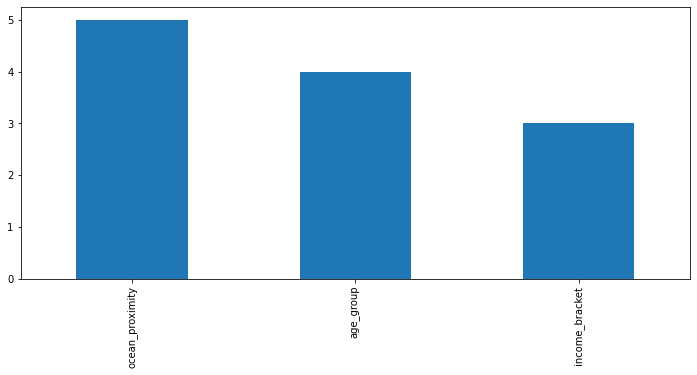

In [43]:
train_df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12, 5))

All the categorical features show a low cardinality, with the exception of `companyId`. We might need to keep an eye on that one as we proceed.

Also, there appears to be no ordinal features within this subset. So, we will not be doing any mapping just yet. Mow, on to the next item on the Analysis Plate!


### Ordinal Features

There are a number of features that are in fact, ordinal. We will map those categories to numbers. These are the `age_group` and the `income_bracket` Features

In [44]:
train_df['age_group'].unique()

array(['middle-aged', 'young', 'minor', 'elderly'], dtype=object)

In [45]:
age_mappings = {'minor': 0, 'young':1, 'middle-aged':2, 'elderly':3}

train_df['age_group'] = train_df['age_group'].map(age_mappings)
train_df['age_group'].unique()

array([2, 1, 0, 3], dtype=int64)

In [46]:
train_df['income_bracket'].unique()

array(['low-income', 'middle-income', 'high-income'], dtype=object)

In [47]:
income_bracket_mappings = {"low-income": 0, "middle-income": 1, "high-income": 2}

train_df['income_bracket'] = train_df['income_bracket'].map(income_bracket_mappings)
train_df['income_bracket'].unique()

array([0, 1, 2], dtype=int64)

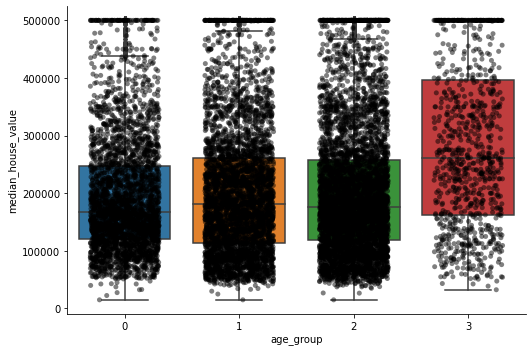

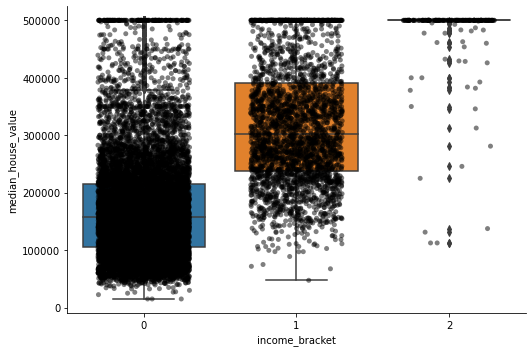

In [48]:
ordinal_vars = ['age_group', 'income_bracket']

for var in ordinal_vars:
    sns.catplot(x=var, y='median_house_value', data=train_df, kind='box', height=5, aspect=1.5)
    sns.stripplot(x=var, y='median_house_value', data=train_df, jitter=0.3, alpha=0.5, color='k')

The increase in median house value with the order value of the Feature is quite evident, although the High Income Bracket seems to have a distribution with a mean that is close to the the maximum house value. 

In [49]:
train_df[train_df['income_bracket'] == 2]['median_house_value'].describe()

count       213.000000
mean     481324.788732
std       63902.292430
min      112500.000000
25%      500001.000000
50%      500001.000000
75%      500001.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [50]:
# Capturing the remaining Categorical Features

cat_others = [var for var in cat_vars if var not in ordinal_vars]

cat_others

['ocean_proximity']

### Rare Categories

Let us investigate whether there are labels that represent a small number of records. Categories that are underrepresented in the dataset tend to cause over-fitting of machine learning models. Hence, they should be removed.

In [51]:
def analyse_rare_categories(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['median_house_value'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_others:
    print(analyse_rare_categories(train_df, var, 0.01))
    print()

ocean_proximity
ISLAND    0.000277
Name: median_house_value, dtype: float64



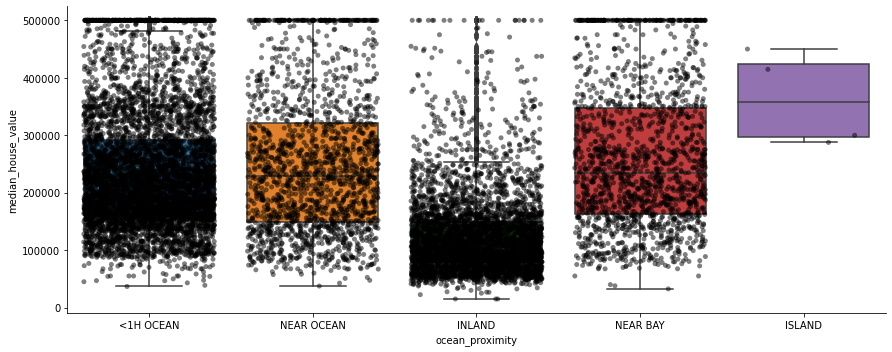

In [52]:
for var in cat_others:
    # make boxplot with Catplot
    sns.catplot(x=var, y='median_house_value', data=train_df, kind="box", height=5, aspect=2.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='median_house_value', data=train_df, jitter=0.4, alpha=0.5, color='k')
    plt.show()

This verifies the above that `ISLAND` is a rare label.

Here is how far we'll push it for the Analysis of the Dataset. We shall now proceed to the Feature Engineering Phase of this Project